In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel


In [2]:
def cleanData(df):
    def calculateAge(month: str, lease_commence_date: float) -> int:
        # calculate years of lease remaining, using 99 years as default, round up to the nearest year
        sold_year = month.strftime('%Y')
        return max(int(int(sold_year) - lease_commence_date), 0)



    df['month'] = pd.to_datetime(df['month'])
    df['age'] = df.apply(
        lambda x: calculateAge(x['month'], x['lease_commence_date']), axis=1)
    df['sold_year'] = df['month'].dt.strftime('%Y')
    df = df.dropna(axis=1)
    try:
        return df[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'age', 'sold_year']].copy(), df[['resale_price']].copy()

    except:
        return df[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'age', 'sold_year']].copy()


In [3]:
df = pd.read_csv('./train.csv')
X, Y =cleanData(df)

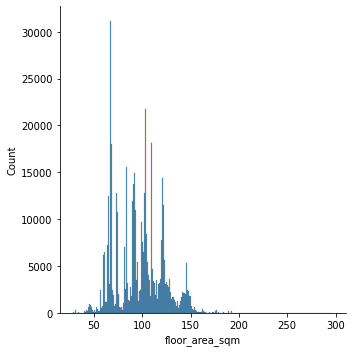

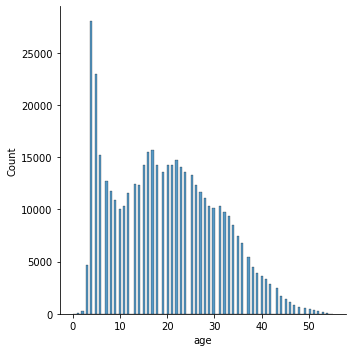

In [4]:
for col in list(X.select_dtypes(['number']).columns):
    sns.displot(X[col])

plt.show()


In [5]:
total = 0
for col in X.select_dtypes('object'):
    total += len(list(X[col].unique()))
    print(col, len(list(X[col].unique())))

total += len(X.select_dtypes('number').columns)
total


town 26
flat_type 7
storey_range 25
flat_model 20
sold_year 23


103

In [6]:
# Apply StandardScaler and Normalizer to numeric data (new)

ct = make_column_transformer(
    (Pipeline([
        ('scaler', StandardScaler()),
        ('normalize', Normalizer()),
    ]),
     make_column_selector(dtype_include=np.number)),  
    (OneHotEncoder(drop='first'),
     make_column_selector(dtype_include=object)))  

ct.fit(X)
preprocessed_df = ct.transform(X)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
preprocessed_df.shape


(462515, 98)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df, Y, test_size=0.33, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

Linear_Model = LinearRegression()
Linear_Model.fit(X_train, y_train)
y_pred_lin = Linear_Model.predict(X_test)

regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)
regr3 = DecisionTreeRegressor(max_depth=8)

regr4 = RandomForestRegressor(max_depth=2, random_state=42)
regr5 = RandomForestRegressor(max_depth=5, random_state=42)
regr6 = RandomForestRegressor(max_depth=8, random_state=42)


regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)
regr3.fit(X_train, y_train)

regr4.fit(X_train, y_train)
regr5.fit(X_train, y_train)
regr6.fit(X_train, y_train)
# diecision tree
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)
y_3 = regr3.predict(X_test)
# random forest
y_4 = regr4.predict(X_test)
y_5 = regr5.predict(X_test)
y_6 = regr6.predict(X_test)

print(mean_squared_error(y_test, y_pred_lin))  # instead of y_true and y_pred?
print(Linear_Model.score(X_test, y_test))

print(mean_squared_error(y_test, y_1))
print(r2_score(y_test, y_1))

print(mean_squared_error(y_test, y_2))
print(r2_score(y_test, y_2))

print(mean_squared_error(y_test, y_3))
print(r2_score(y_test, y_3))

print(mean_squared_error(y_test, y_4))
print(r2_score(y_test, y_4))

print(mean_squared_error(y_test, y_5))
print(r2_score(y_test, y_5))

print(mean_squared_error(y_test, y_6))
print(r2_score(y_test, y_6))


C:\Users\bader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\bader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\bader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2609177188.298868
0.8865980759068856
14866666903.216488
0.3538542958152444
10953053519.565044
0.5239505582894668
8050824333.278996
0.6500893178033847
14699924902.259026
0.3611013558541375
10537273233.52877
0.5420214982961284
7408272040.596926
0.6780163848678091


In [29]:
# regr7 = DecisionTreeRegressor(max_depth=12)
regr8 = RandomForestRegressor(max_depth=12, random_state=42)
# regr7.fit(X_train, y_train)
regr8.fit(X_train, y_train)
# y_7 = regr7.predict(X_test)
y_8 = regr8.predict(X_test)
# print(mean_squared_error(y_test, y_7))
# print(r2_score(y_test, y_7))

print(mean_squared_error(y_test, y_8))
print(r2_score(y_test, y_8))


C:\Users\bader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


4826314623.300277
0.7902352638159374


In [30]:
sel= SelectFromModel(regr8, prefit=True)
selected_feat = X_train[:,(sel.get_support())]


In [31]:
selected_feat.shape
regr9 = RandomForestRegressor(max_depth=12, random_state=42)
regr9.fit(selected_feat,y_train)



C:\Users\bader\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=12, random_state=42)

In [32]:
# X_test[:, ]
(sel.get_support())


array([ True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False])

In [33]:
y_9 = regr9.predict(X_test[:, (sel.get_support())])

print(mean_squared_error(y_test, y_9))
print(r2_score(y_test, y_9))


6354105325.1065
0.7238333322133721


Looking at the residual plot of story vs resale_price, the relationship between these 2 variables are not linear. which make sense as the impact of floors on the price of the property at lower floors are much higher when compared to at higher floorts

Since the F-statistic value is very large and Prob (F-statistic) is less than 0.05, we have sufficient evidence that there is a good amount of linear relationship between the target variable and the feature variables

In [13]:
test_data = pd.read_csv('./test.csv')
X_test = cleanData(test_data)



In [14]:
total = 0
for col in X_test.select_dtypes('object'):
    total += len(list(X[col].unique()))
    print(col, len(list(X[col].unique())))

total += len(X_test.select_dtypes('number').columns)
total

town 26
flat_type 7
storey_range 25
flat_model 20
sold_year 23


103

In [15]:
preprocessed_X_test = ct.transform(X_test)
preprocessed_X_test=preprocessed_X_test[:, kSelectColumnFilter]



In [16]:
preprocessed_X_test.shape


(115629, 96)

In [17]:
print(preprocessed_X_test.shape,X_selected.shape)


(115629, 96) (462515, 96)


In [18]:
y_pred = est.predict(sm.add_constant(preprocessed_X_test.toarray()))


In [19]:
y_pred.shape

(115629,)

In [20]:
submission = pd.DataFrame(
    y_pred, columns=['Resale_price'])

submission['Index'] = np.arange(1, len(submission)+1)

submission = submission[['Index', 'Resale_price']]


In [21]:
submission.to_csv('submission.csv', index=False)


In [22]:
submission

,Index,Resale_price
0,1,278408.475501
1,2,419570.529159
2,3,344262.609740
3,4,568086.169266
4,5,123279.572479
...,...,...
115624,115625,193407.814849
115625,115626,131438.262869
115626,115627,395147.398447
115627,115628,167622.758318
